- Name: Riyaan Chatterjee
- PRN: 23070126507
- TY AIML B


# DCGAN Assignment (CelebA Dataset)

Github link: https://github.com/riyaan999/DCGAN

In this code, we implemented a Deep Convolutional Generative Adversarial Network (DCGAN) to generate realistic face images from the CelebA dataset. Here’s what we did:

	1.	Loaded and Preprocessed CelebA
	•	Resized and normalized images to 64×64 for stable training.
	•	Used PyTorch DataLoader for efficient batch processing.
    
	2.	Defined DCGAN Architecture
	•	Generator (G): Converts random noise into realistic face images.
	•	Discriminator (D): Classifies images as real or fake.
	•	Used ConvTranspose2d & BatchNorm in G, Conv2d & LeakyReLU in D.
    
	3.	Trained the Model for 10 Epochs
	•	Used Binary Cross-Entropy Loss (BCELoss) to train both G and D.
	•	Adam Optimizer for better convergence.
	•	Updated D to distinguish real from fake, and G to fool D.
    
	4.	Monitored Training Progress
	•	Logged losses of G and D over time.
	•	Generated images after each epoch to visualize improvement.
    
	5.	Visualized Results
	•	Plotted loss curves to track learning stability.
	•	Displayed generated face images from random noise.

Final Outcome: A trained DCGAN that can generate synthetic human face images resembling those in the CelebA dataset! 

Starting Training...
[0/10] Batch 0/1583 Loss_D: 1.4661 Loss_G: 2.4443 D(x): 0.4473 D(G(z)): 0.4694 / 0.0907
[0/10] Batch 100/1583 Loss_D: 0.6828 Loss_G: 3.8482 D(x): 0.9233 D(G(z)): 0.4297 / 0.0257
[0/10] Batch 200/1583 Loss_D: 0.5014 Loss_G: 2.5811 D(x): 0.8054 D(G(z)): 0.2140 / 0.1136
[0/10] Batch 300/1583 Loss_D: 0.9777 Loss_G: 3.5310 D(x): 0.8064 D(G(z)): 0.4865 / 0.0371
[0/10] Batch 400/1583 Loss_D: 0.6588 Loss_G: 4.3369 D(x): 0.9322 D(G(z)): 0.4069 / 0.0194
[0/10] Batch 500/1583 Loss_D: 0.4370 Loss_G: 4.9774 D(x): 0.8444 D(G(z)): 0.1966 / 0.0106
[0/10] Batch 600/1583 Loss_D: 0.5523 Loss_G: 2.2259 D(x): 0.7093 D(G(z)): 0.1029 / 0.1424
[0/10] Batch 700/1583 Loss_D: 1.3223 Loss_G: 6.9031 D(x): 0.9469 D(G(z)): 0.6610 / 0.0019
[0/10] Batch 800/1583 Loss_D: 0.9196 Loss_G: 5.2712 D(x): 0.9507 D(G(z)): 0.5363 / 0.0072
[0/10] Batch 900/1583 Loss_D: 1.2519 Loss_G: 5.9906 D(x): 0.9639 D(G(z)): 0.6600 / 0.0039
[0/10] Batch 1000/1583 Loss_D: 0.7955 Loss_G: 3.8841 D(x): 0.8600 D(G(z)): 0.4422

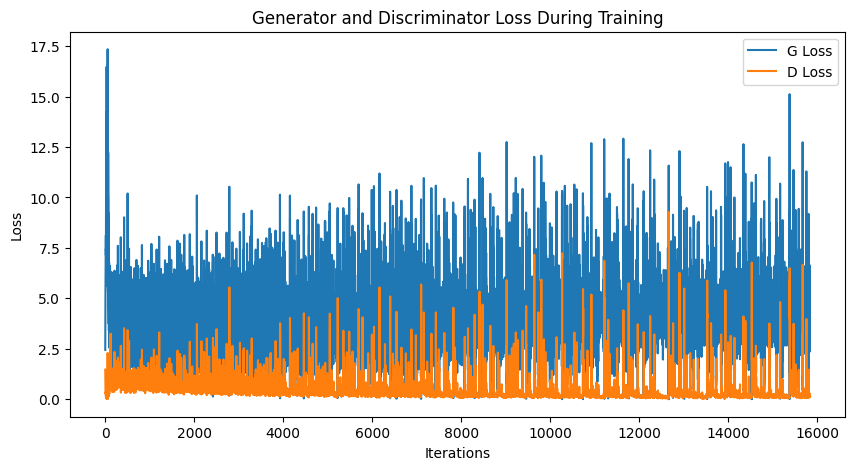

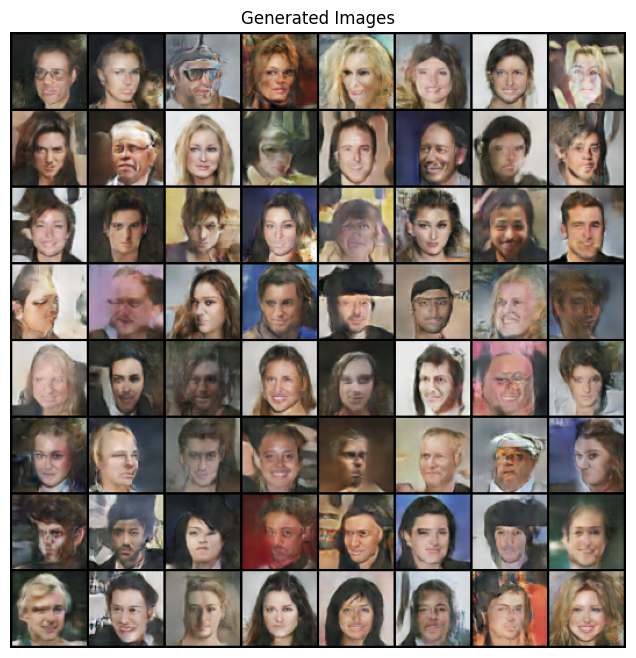

In [1]:
# Install dependencies (if required)
!pip install torch torchvision tqdm matplotlib

# Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.utils as vutils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Load CelebA Dataset
dataset_path = "/kaggle/input/celeba-dataset/img_align_celeba"

transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True, num_workers=2)

# Define Generator
class Generator(nn.Module):
    def __init__(self, nz, ngf, nc):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# Define Discriminator
class Discriminator(nn.Module):
    def __init__(self, nc, ndf):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

# Initialize Models & Optimizers
nz = 100  # Latent vector size
ngf = 64  # Generator feature maps
ndf = 64  # Discriminator feature maps
nc = 3    # Number of channels (RGB)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

netG = Generator(nz, ngf, nc).to(device)
netD = Discriminator(nc, ndf).to(device)

criterion = nn.BCELoss()

optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training Loop
num_epochs = 10  # Reduced to 10 for faster training
real_label = 1.0
fake_label = 0.0

fixed_noise = torch.randn(64, nz, 1, 1, device=device)
img_list = []
G_losses = []
D_losses = []

print("Starting Training...")

for epoch in range(num_epochs):
    for i, (data, _) in enumerate(dataloader, 0):
        netD.zero_grad()
        
        # Train with real batch
        real_data = data.to(device)
        b_size = real_data.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        output = netD(real_data).view(-1)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        # Train with fake batch
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(fake_label)
        output = netD(fake.detach()).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        # Update Generator
        netG.zero_grad()
        label.fill_(real_label)
        output = netD(fake).view(-1)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        # Save Losses
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Print progress
        if i % 100 == 0:
            print(f"[{epoch}/{num_epochs}] Batch {i}/{len(dataloader)} "
                  f"Loss_D: {errD.item():.4f} Loss_G: {errG.item():.4f} "
                  f"D(x): {D_x:.4f} D(G(z)): {D_G_z1:.4f} / {D_G_z2:.4f}")

    # Save generated images for visualization
    with torch.no_grad():
        fake = netG(fixed_noise).detach().cpu()
    img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

print("Training Complete!")

# Visualize Training Progress
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses, label="G Loss")
plt.plot(D_losses, label="D Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Display Generated Images
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Generated Images")
plt.imshow(np.transpose(img_list[-1], (1,2,0)))
plt.show()